## CONCEITO



grafos não direcionados é um grafo bidirecional nao tem direção na seta

grafo não direcionados desconexo, quando existe alguns vertices que esta desconexo dos outros. basicamente existe agrupamentos entre alguns vertices.

grafos orientado, é quando a relaçã oentre os vertices não é simetrica.
grafos valorados, tem arestas com valores ou peso

representação do grafo:
E = {{A, B}, {B, C}, {C, D}, {D, E}, {E, F}, {F, D}, {D, A}}

Euleriano = se e somente se, todos os vertices são de grau par. semieuleriano, se e somente se, tem 2 vertices de grau impar.
grau = é quantas arestas existe ligadas a cada vertices quando o grafo é direcionado criamos 
pontos cartesianos para contar o grau. ex. (0, 2) isso significa que esta chegando 0 arestas e esta saindo 2 arestas.
vertices adjacentes = é quando os vertices são vizinho, ou seja tem uma aresta ligando os vertices.
usamos a biblioteca networkx pra a criação dos grafos. responsavel por desenhar o grafo na tela.

Ponto de articulação é um vértice cuja remoção torna o grafo não conexo

quando pecorremos um grafo de modo aleatório chamamos de walk(passeio)
quando pecorremos um grafo sem a repetição de arestas chamados de trilha
quando pecorremos um grafo onde o vertice final é o mesmo do vertice inicial chamamos de trilha fechada.

algoritmos para obter arvore geradora de custo minimo:
arvore geradora(spanning tree): é uma arvore que conecta todos os vertices de um grafo.

arvore geradora minima(minimum spanning tree, MST): é uma arvore que conecta todos os vertices de um grafo ponderado e a soma dos pesos é a minima. 

temos que desconciderar arestas com custo alto e que fecham ciclos.
tando o algoritmo de Kruskal quanto o algoritmo de Prim tem como objetivo  obter uma arvore geradora de custo minimo. ja o algoritmo de Kikstra estima o menor caminho entre dois pontos. um tem como referencia o peso o outro tem como referencia a quantidade de passos.

Kruskal = as arestas são posta em ordem crescente. BASICAMENTE O KRUSKAL  pega os vertices unicos com menor valor indepentente da ordem ou ligações entre os vertices, e o PRIM pega os vertices unicos com o menor valor seguindo uma ordem de ligação vertice a vertice.

Prim = o algoritmo de prim cria uma fila ordenada para o vertice escolhido e transfere para a MST o caminho com o menor peso sempre. entao se temos {D,C,2} e {D,E,5} sabemos que foi iniciado o grafo pelo vertice D e que  de D para C custa 2, esse é o caminho mais curto entao o caminho a ser adicionado na arvore de custo minimo será esse

Dikstra = estima o menor caminho entre dois pontos, é escolhido dois vertice A e F onde o algoritmo retorna o menor caminho entre os 2 vertice. 



busca em profundidade 

busca em largura

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class visualizacaoGrafo:
    def __init__ (self):
        self.visual = []
    
    def adicionarAresta(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
    
    def desenhar(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G, node_color='lightgrey')
        plt.show()

 


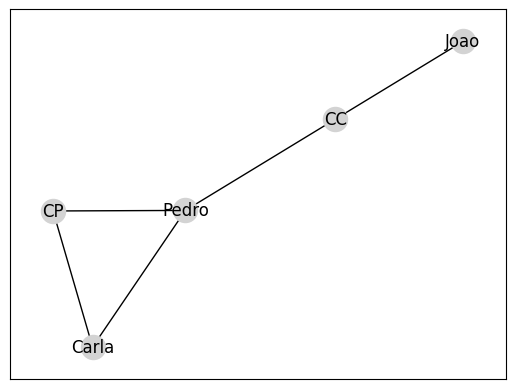

AttributeError: 'Graph' object has no attribute 'visualizacaoGrafo'

In [2]:
G = visualizacaoGrafo()
G.adicionarAresta('Pedro', 'CP')
G.adicionarAresta('Pedro', 'Carla')
G.adicionarAresta('Carla', 'CP')
G.adicionarAresta('Pedro','CC')
G.adicionarAresta('Joao', 'CC')
G.desenhar()

In [ ]:
class Grafo:
    def __init__(self, direcionado=False, valorado=False):
        self._vertices = dict()
        self.direcionado = direcionado
        self.valorado = valorado

    def inserir_vertice(self, id_vertice):
        self._vertices[id_vertice] = Vertice(id_vertice, self.valorado)
        return self.inserir_vertices[id_vertice]
    
    def obter_vertice(self, id_vertice):
        return self._vertice.get(id_vertice)
    
    def raiz_vertice(self, id_vertice):
        return (self.obter_vertice(id_vertice) or self.inserir_vertice(id_vertice))
    
    def inserir_aresta(self, id_origem, id_destino, custo=None):
        if self.valorado and custo is None:
            raise ValueError("Obrigatorio informar o custo")
        v_origem = self._raiz_vertice(id_origem)
        v_destino = self._raiz_vertice(id_destino)
        v_origem.inserir_adjacente(id_destino, custo)

        if not self.direcionado:
            v_destino.inserir_adjacente(id_origem, custo)

    def inserir_arestas(self, arestas):
        for aresta in arestas:
            self.inserir_aresta(*aresta)
    def imprimir(self, rotulo):
        ids_ordenados = sorted(self._vertices.key())
        print('')
        print('{} - Matriz'.format(rotulo))
        print('\t' + '\t'.join(ids_ordenados))
        for i in ids_ordenados:
            vertice = self.obter_vertice(i)
            print(i, end='\t')
            for j in ids_ordenados:
                custo = vertice.obter_custo(j) or 0
                print(custo, end='\t')
            print('i')
        print('')
        print('{} - Lista de adjacencia'.format(rotulo))
        for i in ids_ordenados:
            vertice = self.obter_vertice(i)
            print('| {} |'.format(i), end='')
            for j in ids_ordenados:
                custo = vertice.obter_custo(j) or "
                if custo:
                    apresentacao_custo = ""
                    if self.valorado:
                        apresentacao_custo = "| {}".format(custo)
                    print("->[{}{}]".format(j, apresentacao_custo, end=""))
            print('')
class Vertice:
    def __init__(self, id, valorado=False):
        self.id = id
        self._vizinhos = dict()
        self._valorado = valorado
    
    @property
    def ids_adjacentes(self):
        return self._vizinhos.keys()
    
    def obter_custo(self, id_vizinho):
        if self._valorado:
            return self.vizinhos.get(id_vizinho)
        else:
            return self._vizinhos.get(id_vizinho) or 0